# Part I - (Dataset Exploration Title)
## A project by Ajayi Temiloluwa Samuel

## Introduction
<p>In this section of this project, an exploratory data analysis is conducted on the Ford GoBike dataset.

<p>Ford GoBike is a regional public bike sharing system in the San Francisco Bay Area, California. The dataset used for this exploratory analysis consists of monthly individual trip data from February, 2019 in CSV format covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from datetime import datetime
warnings.simplefilter("ignore")

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
ford_trip_df = pd.read_csv('fordgobike_tripdata.csv')
ford_trip_df


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### Assesing the Data.


In [3]:
ford_trip_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
ford_trip_df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [5]:
ford_trip_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
171817,548,2019-02-03 18:41:52.5440,2019-02-03 18:51:00.8830,369.0,Hyde St at Post St,37.787349,-122.416651,99.0,Folsom St at 15th St,37.767037,-122.415442,1392,Subscriber,1986.0,Male,No
65046,223,2019-02-20 10:20:11.1730,2019-02-20 10:23:54.2550,11.0,Davis St at Jackson St,37.797280,-122.398436,10.0,Washington St at Kearny St,37.795393,-122.404770,4597,Subscriber,1996.0,Male,No
60265,895,2019-02-20 18:43:32.4890,2019-02-20 18:58:27.6830,22.0,Howard St at Beale St,37.789756,-122.394643,97.0,14th St at Mission St,37.768265,-122.420110,6563,Subscriber,NaN,NaN,No
106496,444,2019-02-13 18:06:34.2080,2019-02-13 18:13:58.4420,50.0,2nd St at Townsend St,37.780526,-122.390288,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2012,Subscriber,1971.0,Male,No
106468,437,2019-02-13 18:08:47.9580,2019-02-13 18:16:05.5610,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,-122.264791,1867,Subscriber,1994.0,Male,No


In [6]:
ford_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
for col in ford_trip_df.columns.values.tolist():
    print('\n' + col)
    print(ford_trip_df[col].value_counts())
    print('\n')
    print(ford_trip_df[col].sample(10))
    print('dtype:' + str(ford_trip_df[col].dtype))
    print('_'*50)
    


duration_sec
272      311
324      292
323      291
306      291
305      290
        ... 
18550      1
11018      1
2232       1
4244       1
2822       1
Name: duration_sec, Length: 4752, dtype: int64


105715     127
18182      453
14412     1181
61116      525
64956      235
133298     612
31699      338
7584       930
65808      188
72935      583
Name: duration_sec, dtype: int64
dtype:int64
__________________________________________________

start_time
2019-02-25 08:52:07.5820    2
2019-02-01 13:40:09.4920    2
2019-02-19 17:52:44.1750    2
2019-02-22 20:11:42.2560    2
2019-02-15 07:47:00.1970    2
                           ..
2019-02-20 17:54:42.6980    1
2019-02-20 17:53:04.7100    1
2019-02-20 17:57:15.1140    1
2019-02-20 17:53:48.7180    1
2019-02-01 00:00:20.6360    1
Name: start_time, Length: 183401, dtype: int64


123501    2019-02-11 09:17:39.0310
84570     2019-02-17 17:15:23.5720
98639     2019-02-15 07:17:30.4070
8693      2019-02-28 08:13:48.1280
75966     2019-02

In [8]:
ford_trip_df.duplicated().sum()

0

In [9]:
ford_trip_df.shape


(183412, 16)

In [10]:
ford_trip_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

#### Issues.

<ul>
    <li>The start_station_id, end_station_id, start_timer end_time, and member_birth_year columns all have wrong datatypes.</li>
    <li>Some values of the bike_id, start_station_id, and end_station_id are not in the stardard format(i.e, not uniform number of characters.)</li>
    <li>More useful information can be extractred, if age is deduced from the member_birth-year</li>
    <li>More useful information can be extracted from the start_date, end_date, duration_sec</li>
</ul>

### Cleaning up the dataset

In [11]:
# make a copy of the dataframe.
ford_trip_df_clean = ford_trip_df.copy()
ford_trip_df_clean.dropna(inplace=True)
ford_trip_df_clean


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


#### Define

<ul>
    <li>Change the datatypes of the start_station_id, end_station_id, start_timer end_time, and member_birth_year columns .</li>
    <li>Standardize the values of the bike_id, start_station_id, and end_station_id columns by adding the appropraite number of zero to make the values of equal number of characters.</li>
    <li>extract the rider's age by subtracting their year  of birth from the present year.
    <li>extract the age and duration categories
    <li>create columns of start_day, start_hour and start_month from the start_time column and end_day, end_hour and end_month from the end_time column

In [12]:
ford_trip_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [13]:
ford_trip_df_clean.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [14]:
ford_trip_df_clean['user_type'] = ford_trip_df_clean['user_type'].astype('category')
ford_trip_df_clean['member_gender'] = ford_trip_df_clean['member_gender'].astype('category')
ford_trip_df_clean['bike_share_for_all_trip'] = ford_trip_df_clean['bike_share_for_all_trip'].astype('category')

In [15]:
ford_trip_df_clean['start_station_id'] = list(ford_trip_df_clean['start_station_id'].values.astype('int').astype('str'))
ford_trip_df_clean['end_station_id'] = list(ford_trip_df_clean['end_station_id'].values.astype('int').astype('str'))
ford_trip_df_clean['bike_id'] = list(ford_trip_df_clean['bike_id'].values.astype('int').astype('str'))
ford_trip_df_clean['member_birth_year'] = list(ford_trip_df_clean['member_birth_year'].values.astype('int'))
ford_trip_df_clean.start_time = pd.to_datetime(ford_trip_df_clean.start_time)
ford_trip_df_clean.end_time = pd.to_datetime(ford_trip_df_clean.end_time)
ford_trip_df_clean['duration_minutes'] = ford_trip_df_clean['duration_sec']/60
ford_trip_df_clean.duration_minutes = ford_trip_df_clean.duration_minutes.astype('int')

In [16]:
ford_trip_df_clean['start_station_id'] = ford_trip_df_clean['start_station_id'].apply(lambda x: '{0:0>6}'.format(x))
ford_trip_df_clean['end_station_id'] = ford_trip_df_clean['end_station_id'].apply(lambda x: '{0:0>6}'.format(x))
ford_trip_df_clean['bike_id'] = ford_trip_df_clean['bike_id'].apply(lambda x: '{0:0>4}'.format(x))

In [17]:
ford_trip_df_clean['rider\'s_age'] = (2019 - ford_trip_df_clean['member_birth_year'].astype('int'))


In [18]:
ford_trip_df_clean["rider's_age_group"] = pd.cut(ford_trip_df_clean["rider's_age"], bins = [18, 20, 45, 60, 141], include_lowest = True, labels=['Teenagers', 'Young_adults', 'Middle_age_adults', 'Old_age_adults'])
ford_trip_df_clean["duration_hour_group"] = pd.cut(ford_trip_df_clean["duration_sec"], bins = [61, 14400, 28800, 43200, 57600, 72000, 84548], include_lowest = True, labels=['Less_than_4_hours', 'btw_4_and_8_hours', 'btw_8_and_12_hours', 'btw_12_and_16_hours', 'btw_16_and_20_hours', 'approx_a_day'])

In [19]:
ford_trip_df_clean['start_hour'] = ford_trip_df_clean.start_time.dt.strftime('%H')
ford_trip_df_clean['start_day'] = ford_trip_df_clean.start_time.dt.strftime('%A')
ford_trip_df_clean['start_month'] = ford_trip_df_clean.start_time.dt.strftime('%B')
ford_trip_df_clean['end_hour'] = ford_trip_df_clean.end_time.dt.strftime('%H')
ford_trip_df_clean['end_day'] = ford_trip_df_clean.end_time.dt.strftime('%A')
ford_trip_df_clean['end_month'] = ford_trip_df_clean.end_time.dt.strftime('%B')

#### Test

In [20]:
ford_trip_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [21]:
ford_trip_df_clean.dtypes


duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip          category
duration_minutes                    int32
rider's_age                         int32
rider's_age_group                category
duration_hour_group              category
start_hour                         object
start_day                          object
start_month                        object
end_hour                          

In [22]:
ford_trip_df_clean["rider's_age"].value_counts().sort_index()

18       34
19     1675
20     2504
21     3208
22     3476
       ... 
109       1
117      11
118       6
119      53
141       1
Name: rider's_age, Length: 75, dtype: int64

In [23]:
ford_trip_df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,duration_minutes,rider's_age,rider's_age_group,duration_hour_group,start_hour,start_day,start_month,end_hour,end_day,end_month
75933,994,2019-02-19 08:34:51.110,2019-02-19 08:51:25.262,000053,Grove St at Divisadero,37.775946,-122.437777,000017,Embarcadero BART Station (Beale St at Market St),37.792251,...,16,56,Middle_age_adults,Less_than_4_hours,08,Tuesday,February,08,Tuesday,February
13962,1136,2019-02-27 13:50:10.401,2019-02-27 14:09:06.542,000026,1st St at Folsom St,37.787290,-122.394380,000324,Union Square (Powell St at Post St),37.788300,...,18,20,Teenagers,Less_than_4_hours,13,Wednesday,February,14,Wednesday,February
93383,509,2019-02-15 17:42:17.730,2019-02-15 17:50:46.756,000043,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,000015,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,8,43,Young_adults,Less_than_4_hours,17,Friday,February,17,Friday,February
51406,2132,2019-02-21 17:36:30.865,2019-02-21 18:12:03.726,000003,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,000058,Market St at 10th St,37.776619,...,35,26,Young_adults,Less_than_4_hours,17,Thursday,February,18,Thursday,February
91634,939,2019-02-16 00:11:34.826,2019-02-16 00:27:14.620,000053,Grove St at Divisadero,37.775946,-122.437777,000141,Valencia St at Cesar Chavez St,37.747998,...,15,30,Young_adults,Less_than_4_hours,00,Saturday,February,00,Saturday,February
57258,462,2019-02-21 08:25:50.657,2019-02-21 08:33:33.649,000046,San Antonio Park,37.790140,-122.242373,000201,10th St at Fallon St,37.797673,...,7,48,Middle_age_adults,Less_than_4_hours,08,Thursday,February,08,Thursday,February
120497,770,2019-02-11 16:54:07.100,2019-02-11 17:06:57.863,000098,Valencia St at 16th St,37.765052,-122.421866,000223,16th St Mission BART Station 2,37.764765,...,12,54,Middle_age_adults,Less_than_4_hours,16,Monday,February,17,Monday,February
67259,495,2019-02-20 08:06:02.702,2019-02-20 08:14:18.066,000196,Grand Ave at Perkins St,37.808894,-122.256460,000182,19th Street BART Station,37.809013,...,8,41,Young_adults,Less_than_4_hours,08,Wednesday,February,08,Wednesday,February
169052,70,2019-02-04 12:34:31.541,2019-02-04 12:35:41.889,000080,Townsend St at 5th St,37.775235,-122.397437,000030,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,1,44,Young_adults,Less_than_4_hours,12,Monday,February,12,Monday,February
83884,577,2019-02-17 19:54:44.375,2019-02-17 20:04:21.589,000078,Folsom St at 9th St,37.773717,-122.411647,000284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,...,9,34,Young_adults,Less_than_4_hours,19,Sunday,February,20,Sunday,February


In [24]:
#saving dataframe
ford_trip_df_clean.to_csv('ford_data_clean.csv')

### What is the structure of your dataset?

Originally, the dataset has 183412 rows and 16 columns('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip').

### What is/are the main feature(s) of interest in your dataset?

My area of interest is to explore how other variables affect the trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will be making a great use of the following variable: ('duration_sec',  'start_time', 'end_time', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip')

## Univariate Exploration

What are the general statistics of the dataframe? what are the variables ('duration_sec', 'start_time', 'end_time', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip','duration_minutes', 'rider's_age', 'rider's_age_group', 'duration_hour_group', 'start_hour', 'start_day', 'end_hour', 'end_day') composed of? How are they distributed?

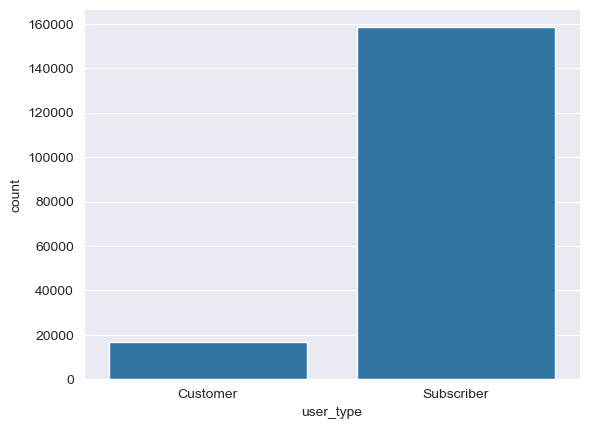

In [25]:
sb.set_style('darkgrid') # set grid color

# plotting the chart
sb.countplot(data=ford_trip_df_clean, x="user_type", color = sb.color_palette()[0])
 
# removing the right and top borders of the axes
sb.despine()

plt.show()

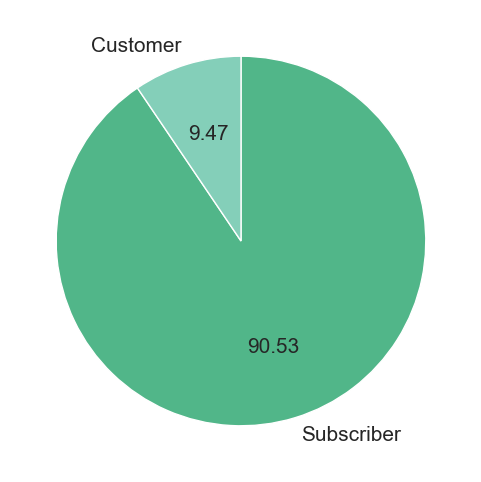

In [26]:
user_type = ford_trip_df_clean['user_type'].value_counts()
sb.color_palette()[0]

plt.figure(figsize=[6,6])

plt.pie(user_type, startangle = 90, labels=user_type.index, autopct='%.2f', counterclock = False, textprops={'fontsize': 15}, colors = sb.color_palette('BuGn_r')[2:4]);


#### Inferences

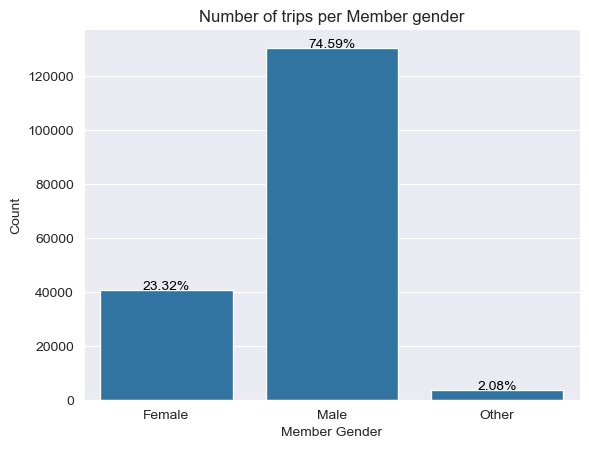

In [27]:
sb.set_style('darkgrid') # set grid color

# plotting the chart
sb.countplot(data=ford_trip_df_clean, x="member_gender", color = sb.color_palette()[0])
gender_count = ford_trip_df_clean['member_gender'].value_counts()
num_of_trips = ford_trip_df_clean['member_gender'].value_counts().sum()
#Get the current tick locations and labels
locs, labels = plt.xticks(rotation = 0)
for loc, labels in zip(locs, labels):
    counts = gender_count[labels.get_text()]
    pct_string = '{:.2f}%'.format(100*counts/num_of_trips)
    plt.text(loc, counts+2, pct_string, ha='center', color='black')
plt.title('Number of trips per Member gender')
plt.xlabel('Member Gender')
plt.ylabel('Count')

# removing the right and top borders of the axes
sb.despine()

plt.show()

## Inferences

23.3 percent of the user are female while 74.6 percents were male, 2 percent preferred the option others

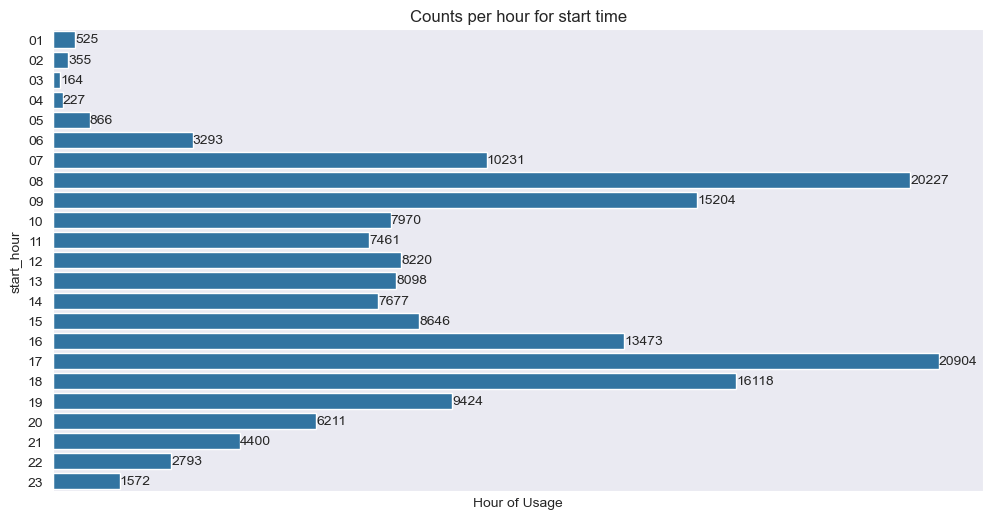

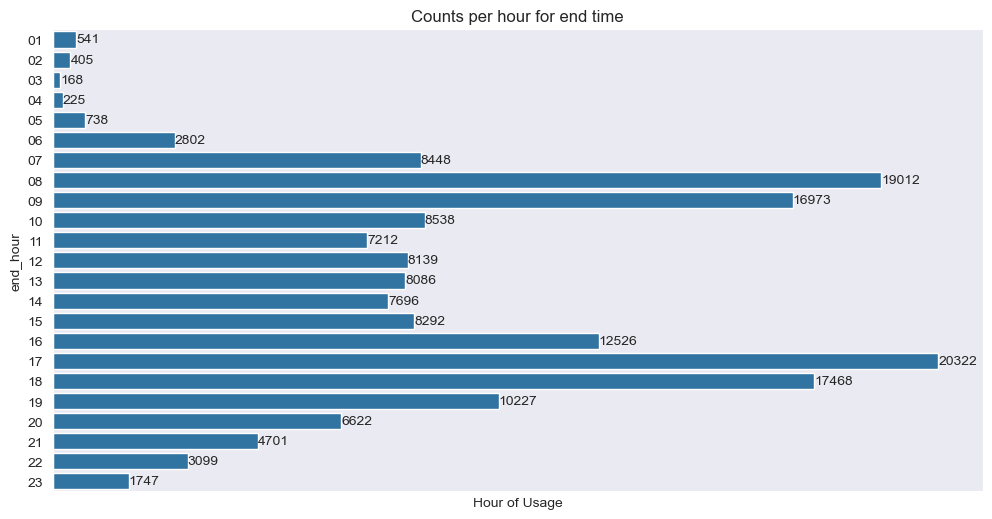

In [28]:

plt.figure(figsize = [12, 6])
ax = sb.countplot(data=ford_trip_df_clean ,y='start_hour', color = sb.color_palette()[0], order= ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']);
for i in ax.containers:
    
    ax.bar_label(i,)
plt.xlabel('Hour of Usage')
plt.xticks([])
plt.title('Counts per hour for start time');


ford_trip_df_clean['end_hour'] = ford_trip_df_clean['end_hour']
plt.figure(figsize = [12, 6])
ax = sb.countplot(data=ford_trip_df_clean ,y='end_hour', color = sb.color_palette()[0], order= ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']);
for i in ax.containers:
    
    ax.bar_label(i,)
plt.xlabel('Hour of Usage')
plt.xticks([])
plt.title('Counts per hour for end time');

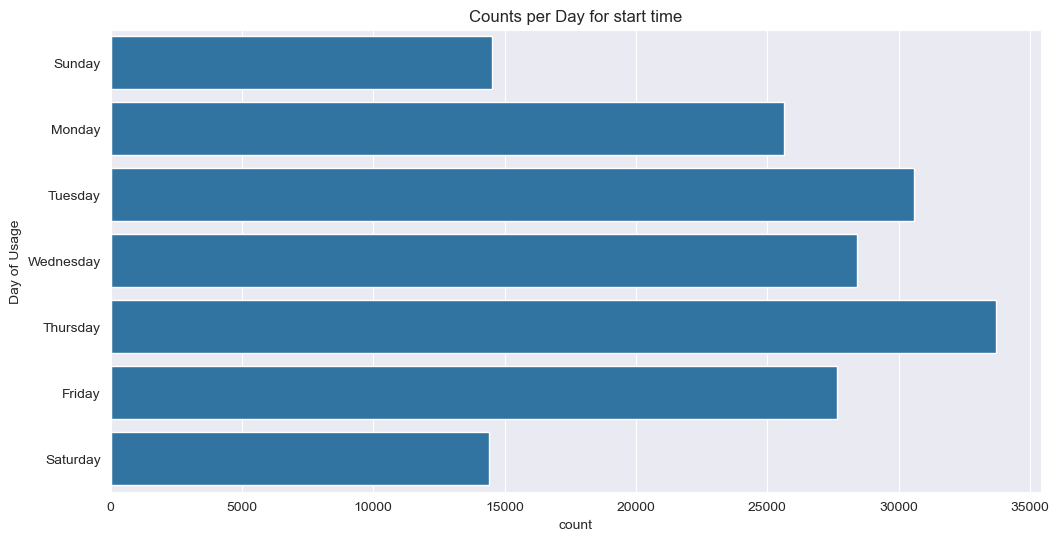

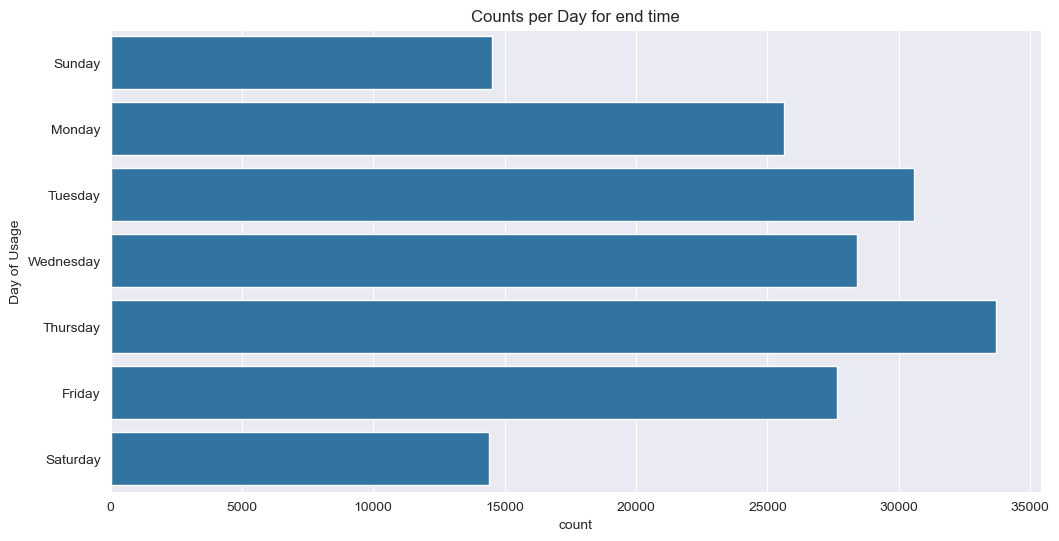

In [29]:
plt.figure(figsize = [12, 6])
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

sb.countplot(data=ford_trip_df_clean ,y='start_day', order = order, color = sb.color_palette()[0], );
plt.ylabel('Day of Usage')
plt.title('Counts per Day for start time');



plt.figure(figsize = [12, 6])
sb.countplot(data=ford_trip_df_clean ,y='end_day', order = order, color = sb.color_palette()[0] );
plt.ylabel('Day of Usage')
plt.title('Counts per Day for end time');

#### Inferences
<ul>
<li>Between 7am to 9am and 4pm to 7pm, there is a high level of activities, this is due to the rush of the people resuming work, school and office in the morning and the closing hours in the evening.
<li>There is a higher number of trips made on weekdays compared to weekends.

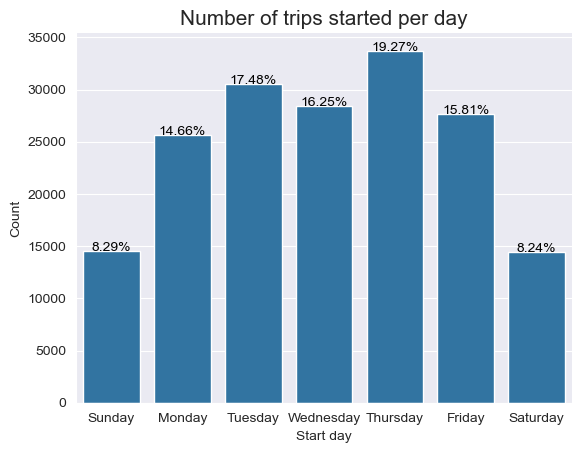

In [30]:
sb.set_style('darkgrid') # set grid color

# plotting the chart
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.countplot(data=ford_trip_df_clean, x="start_day", order = order, color = sb.color_palette()[0])
start_day_count = ford_trip_df_clean['start_day'].value_counts()
num_of_trips = ford_trip_df_clean['start_day'].value_counts().sum()
#Get the current tick locations and labels
locs, labels = plt.xticks(rotation = 0)
for loc, labels in zip(locs, labels):
    counts = start_day_count[labels.get_text()]
    pct_string = '{:.2f}%'.format(100*counts/num_of_trips)
    plt.text(loc, counts+2, pct_string , ha='center', color='black')
plt.title('Number of trips started per day', fontsize = 15)

plt.xlabel('Start day')
plt.ylabel('Count')
sb.despine()

plt.show()


# plotting the chart


#### Inferences
Thursday has the highest number of trips(19.27%) and saturday have the lowest(8.24%).

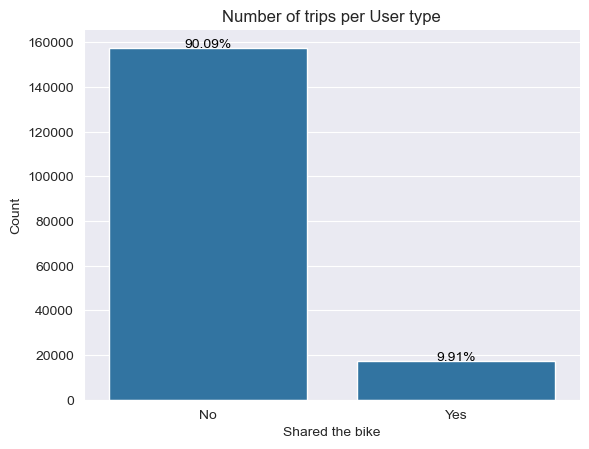

In [31]:
sb.countplot(data=ford_trip_df_clean, x="bike_share_for_all_trip", color = sb.color_palette()[0])
bike_share_count = ford_trip_df_clean['bike_share_for_all_trip'].value_counts()
num_of_trips = ford_trip_df_clean['bike_share_for_all_trip'].value_counts().sum()
#Get the current tick locations and labels
locs, labels = plt.xticks(rotation = 0)
for loc, labels in zip(locs, labels):
    counts = bike_share_count[labels.get_text()]
    pct_string = '{:.2f}%'.format(100*counts/num_of_trips)
    plt.text(loc, counts+2, pct_string, ha='center', color='black')
plt.title('Number of trips per User type')
plt.xlabel('Shared the bike')
plt.ylabel('Count')



# removing the right and top borders of the axes
sb.despine()

plt.show()

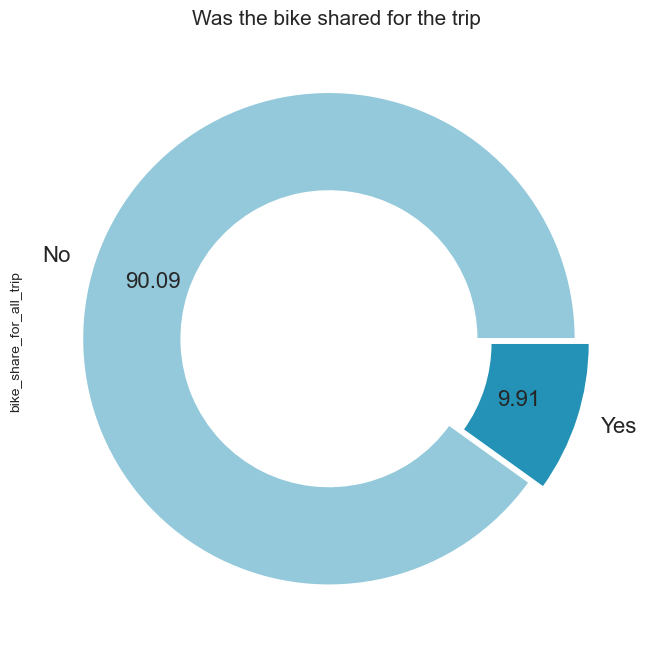

In [32]:
colors = sb.color_palette('ocean_r')[0:6] #check color pallete for more colors

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.03, 0.03)  

#create pie chart
plt.figure(figsize=[10,8])

#adjust the text position and explod the donut chart
ford_trip_df_clean.bike_share_for_all_trip.value_counts().plot(kind="pie", labels=['No', 'Yes'], autopct='%0.02f', colors = colors, textprops={'fontsize': 16}, 
                              explode=explode, wedgeprops = {'width' : 0.4}, pctdistance=0.75) #explodes the chart

# pcddistance - adjust the position of the values

plt.title('Was the bike shared for the trip', fontsize=15)
plt.show()

#### Inference
90 percents of user didn't share their bikes, 10 percents do.

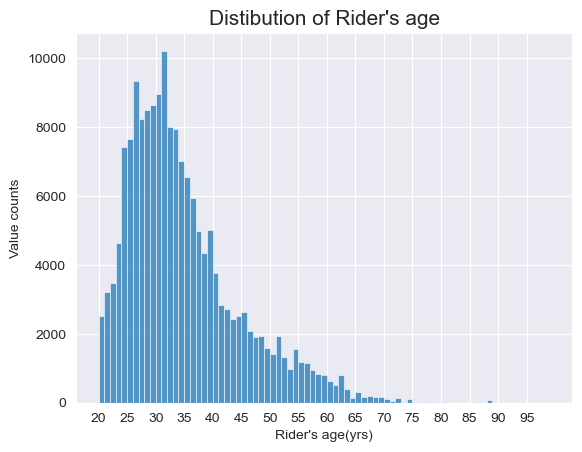

In [33]:
bins = np.arange(20, 100, 1)
ticks = np.arange(20, 100, 5)
plt.xticks(ticks, ticks);
plt.xlabel("Rider's age(yrs)")
plt.ylabel("Value counts")
plt.title('Distibution of Rider\'s age', fontsize=15)
sb.histplot(data=ford_trip_df_clean, x="rider's_age", bins=bins);

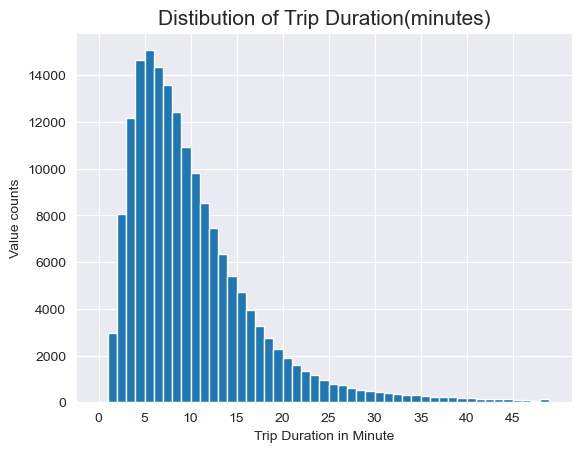

In [34]:
bins = np.arange(0, 50, 1)
ticks = np.arange(0, 50, 5)
plt.hist(data=ford_trip_df_clean, x='duration_minutes', bins=bins);
plt.ylabel("Value counts")
plt.title('Distibution of Trip Duration(minutes)', fontsize=15)
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

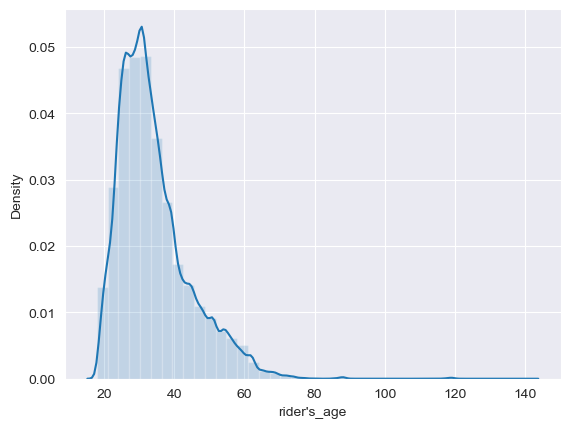

In [35]:
sb.distplot(ford_trip_df_clean["rider's_age"], bins=40, kde=True, hist_kws = {'alpha' : 0.2});

#### Inference
This shows that the distribution of age is right skewed

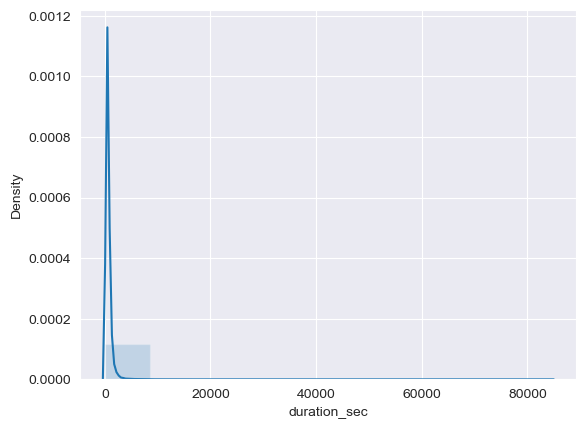

In [36]:
sb.distplot(ford_trip_df_clean.duration_sec, bins=10, kde=True, hist_kws = {'alpha' : 0.2});

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

<ul>
    <li>There are about 90.5 percents of the users are subscribers and 9.5 percents are just customer(one-off users). This shows that majority of those who makes the trip are those who subscribe(pay) for the bikes for a period of time.
    <li>23.3 percent of the user are female while 74.6 percents were male, 2 percent preferred the option others
    <li>Between 7am to 9am and 4pm to 7pm, there is a high level of activities, this is due to the rush of the people resuming work, school and office in the morning and the closing hours in the evening.
    <li>There is a higher number of trips made on weekdays compared to weekends.
    <li>Thursday has the highest number of trips(19.27%) and saturday have the lowest(8.24%).
    <li>The distribution of age is right skewed.
    <li>Thursday has the highest number of trips(19.27%) and saturday have the lowest(8.24%).
    <li>90 percents of user didn't share their bikes, 10 percents do.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Originally, the  rider's age variable gave a visualization that isn't useful, there was a need to create new bins to adjust the narrow region so that much useful visualization can be made.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [37]:
ford_trip_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [38]:
ford_trip_df_clean.dtypes


duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip          category
duration_minutes                    int32
rider's_age                         int32
rider's_age_group                category
duration_hour_group              category
start_hour                         object
start_day                          object
start_month                        object
end_hour                          

In [39]:
ford_trip_df_clean["rider's_age"].value_counts().sort_index()

18       34
19     1675
20     2504
21     3208
22     3476
       ... 
109       1
117      11
118       6
119      53
141       1
Name: rider's_age, Length: 75, dtype: int64

In [40]:
ford_trip_df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,duration_minutes,rider's_age,rider's_age_group,duration_hour_group,start_hour,start_day,start_month,end_hour,end_day,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,000021,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,000013,Commercial St at Montgomery St,37.794231,...,869,35,Young_adults,btw_12_and_16_hours,17,Thursday,February,08,Friday,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,000086,Market St at Dolores St,37.769305,-122.426826,000003,Powell St BART Station (Market St at 4th St),37.786375,...,1030,47,Middle_age_adults,btw_16_and_20_hours,12,Thursday,February,05,Friday,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,000375,Grove St at Masonic Ave,37.774836,-122.446546,000070,Central Ave at Fell St,37.773311,...,608,30,Young_adults,btw_8_and_12_hours,17,Thursday,February,04,Friday,March
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,000007,Frank H Ogawa Plaza,37.804562,-122.271738,000222,10th Ave at E 15th St,37.792714,...,26,45,Young_adults,Less_than_4_hours,23,Thursday,February,00,Friday,March
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,000093,4th St at Mission Bay Blvd S,37.770407,-122.391198,000323,Broadway at Kearny,37.798014,...,29,60,Middle_age_adults,Less_than_4_hours,23,Thursday,February,00,Friday,March


In [41]:
ford_trip_df_clean['duration_sec'].value_counts().sort_index().head(20)

61    18
62    19
63    22
64    17
65    22
66    24
67    26
68    25
69    32
70    21
71    25
72    33
73    36
74    35
75    29
76    51
77    36
78    32
79    36
80    34
Name: duration_sec, dtype: int64

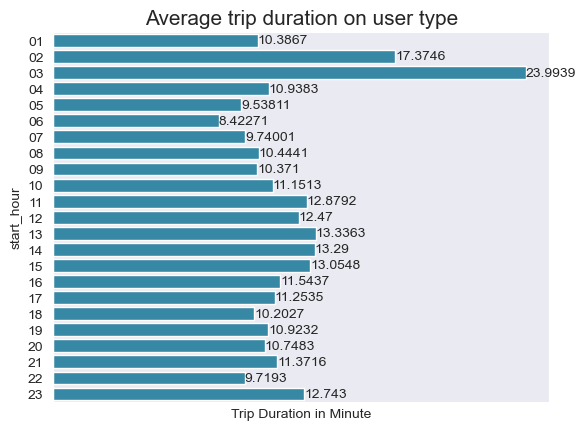

In [42]:
ax = sb.barplot(data = ford_trip_df_clean, y='start_hour',x='duration_minutes', color =  sb.color_palette('ocean_r')[1], ci=None ,order= ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'] )
plt.xlabel('Trip Duration in Minute');
plt.title('Average trip duration on user type', fontsize = 15)

for i in ax.containers:
    
    ax.bar_label(i,)
plt.xticks([])

plt.show()

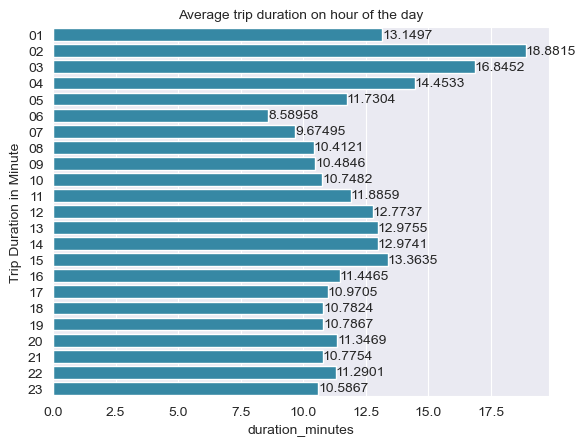

In [43]:
ax = sb.barplot(data = ford_trip_df_clean, y='end_hour',x='duration_minutes', color =  sb.color_palette('ocean_r')[1], ci=None ,order= ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'] )
plt.ylabel('Trip Duration in Minute');
plt.title('Average trip duration on hour of the day', fontsize = 10)
ax.bar_label(ax.containers[0])
plt.show()

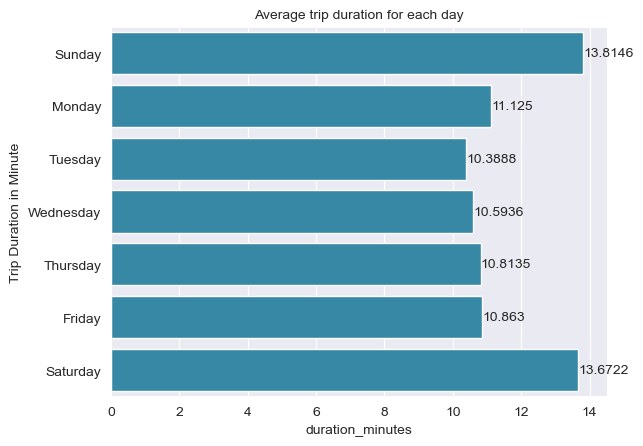

In [44]:
ax = sb.barplot(data = ford_trip_df_clean, y='start_day',x='duration_minutes', color =  sb.color_palette('ocean_r')[1], ci=None ,order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] )
plt.ylabel('Trip Duration in Minute');
plt.title('Average trip duration for each day', fontsize = 10)
ax.bar_label(ax.containers[0])
plt.show()

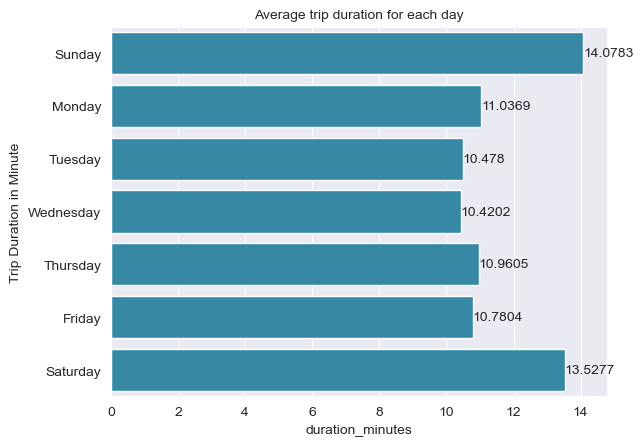

In [45]:
ax = sb.barplot(data = ford_trip_df_clean, y='end_day',x='duration_minutes', color =  sb.color_palette('ocean_r')[1], ci=None ,order= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] )
plt.ylabel('Trip Duration in Minute');
plt.title('Average trip duration for each day', fontsize = 10)
ax.bar_label(ax.containers[0])
plt.show()

#### Interference
<ul>
<li>It is noted that those who ride from between 12am to 4pm generally rides for a longer period of time. Also there is a similar long duration of ride between 11am to 1pm.
 <li>Despite the fact that fewer number of trips were made during weekends, longer trips were made during weekends(saturdays and sundays) lasting for about 14 minutes on the average.

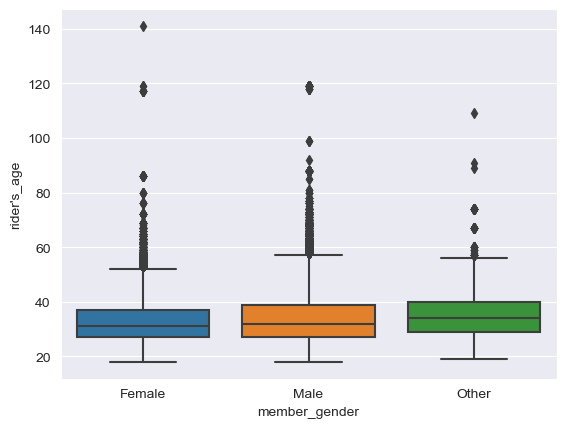

In [46]:
sb.boxplot(data=ford_trip_df_clean, y="rider's_age", x='member_gender')
plt.xticks(rotation = 0);

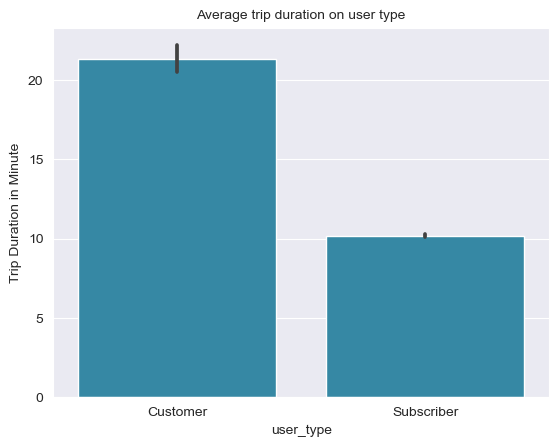

In [47]:
sb.barplot(data = ford_trip_df_clean, x='user_type',y='duration_minutes', color =  sb.color_palette('ocean_r')[1] )
plt.ylabel('Trip Duration in Minute');
plt.title('Average trip duration on user type', fontsize = 10)
plt.show()

#### Interfernce

Averagely subscribers rides for a shorter period of time with customer riding for a longer period of time.
customers have the highest average duration, but it has many outlying values.

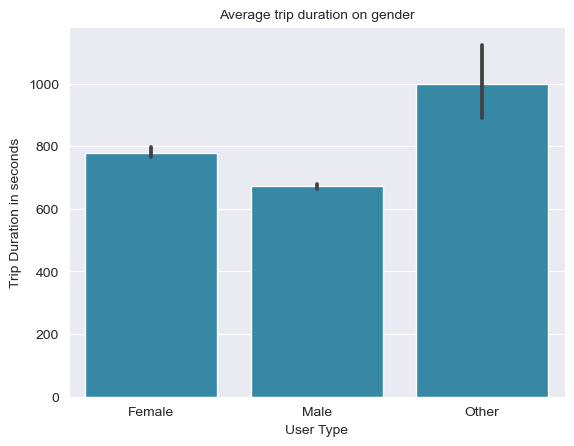

In [48]:
sb.barplot(data = ford_trip_df_clean, x='member_gender', y='duration_sec', color =  sb.color_palette('ocean_r')[1] )
plt.xlabel('User Type');
plt.ylabel('Trip Duration in seconds');
plt.title('Average trip duration on gender', fontsize = 10)
plt.show()


#### Inference
Averagely males rides for a shorter period of time with female riding for a longer period of time.
others have the highest average duration, but it has many outlying values.

Text(0.5, 1.0, 'Average trip duration on user type')

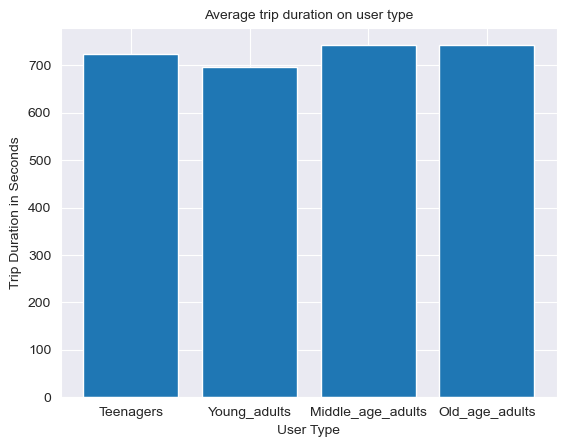

In [49]:
avg_duration = ford_trip_df_clean.groupby("rider's_age_group").duration_sec.mean();
plt.bar(avg_duration.index, avg_duration.values);
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Seconds');
plt.title('Average trip duration on user type', fontsize = 10)


#### Inference
Averagely Young adults rides for a shorter period of time with Middle age adults riding for a longer period of time


Text(0.5, 1.0, 'Rider age for each user type')

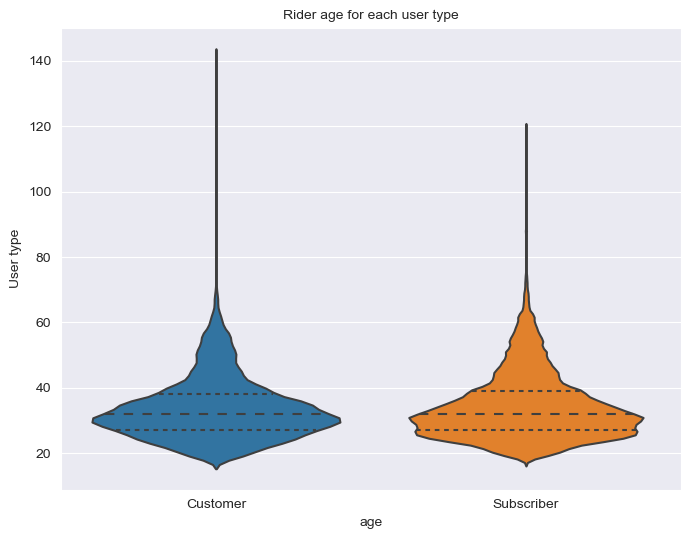

In [50]:
plt.figure(figsize=[8,6])
sb.violinplot(data= ford_trip_df_clean, y="rider's_age", x='user_type', inner = 'quartile')
plt.xlabel('age');
plt.ylabel('User type');
plt.title('Rider age for each user type', fontsize = 10)

#### Inference
This shows that both costomers and subscribers have a higher percentage of their users betweeb 20 and 40, with customers having more outlying values.

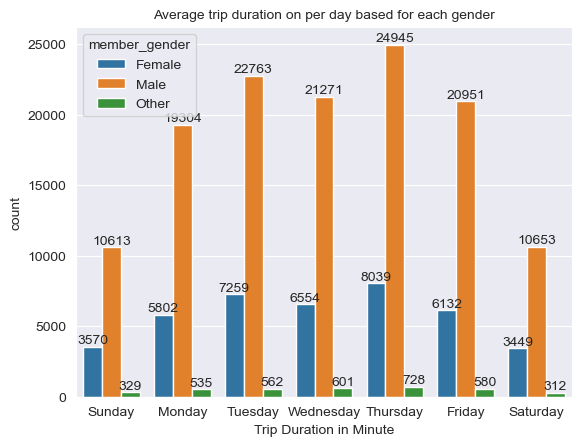

In [51]:
ax = sb.countplot(data = ford_trip_df_clean, x='start_day', hue = 'member_gender', order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] )
plt.xlabel('Trip Duration in Minute');
plt.title('Average trip duration on per day based for each gender', fontsize = 10)

for i in ax.containers:
    
    ax.bar_label(i,)

plt.show()


<AxesSubplot:xlabel='member_gender', ylabel='count'>

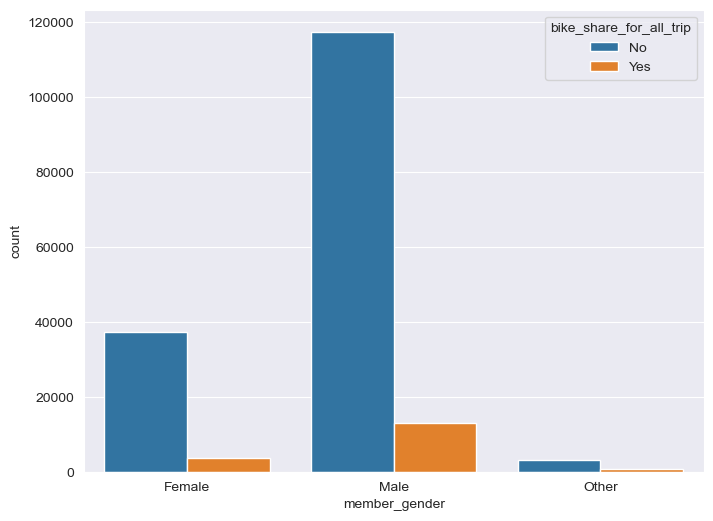

In [52]:
plt.figure(figsize=[8,6])
sb.countplot(data=ford_trip_df_clean, x='member_gender', hue='bike_share_for_all_trip')

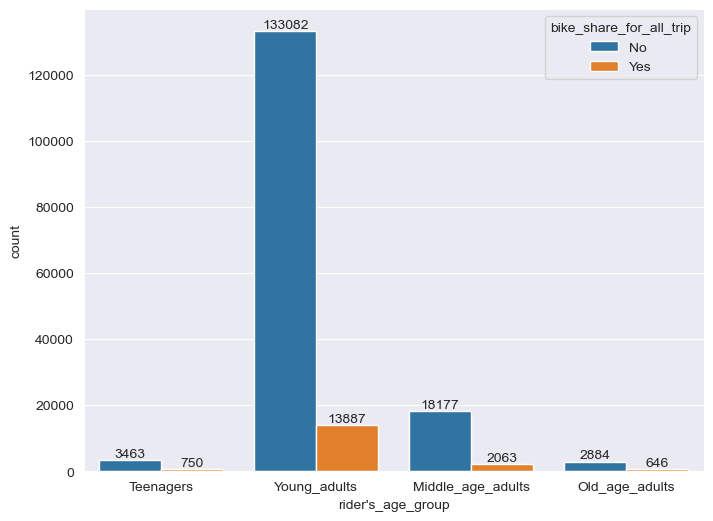

In [53]:
plt.figure(figsize=[8,6])
ax = sb.countplot(data=ford_trip_df_clean, x="rider's_age_group", hue='bike_share_for_all_trip')

for i in ax.containers:
    
    ax.bar_label(i,)


#### Inference
Most of the user don't share their bikes with the young adults having the greater percentage.

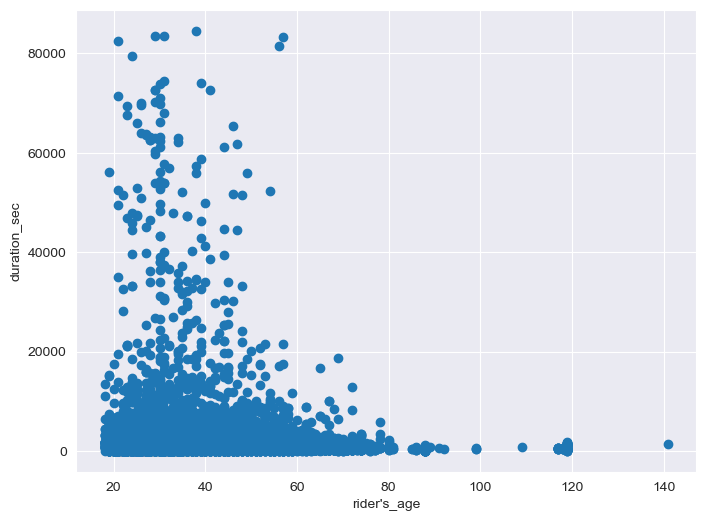

In [54]:
plt.figure(figsize = [8, 6])

plt.scatter(data = ford_trip_df_clean , x = "rider's_age", y = "duration_sec", alpha = 1/1)
plt.xlabel("rider's_age")
plt.ylabel("duration_sec")
plt.show()

#### Inference

There is no correlation between rider's age and duration

<Figure size 2000x2000 with 0 Axes>

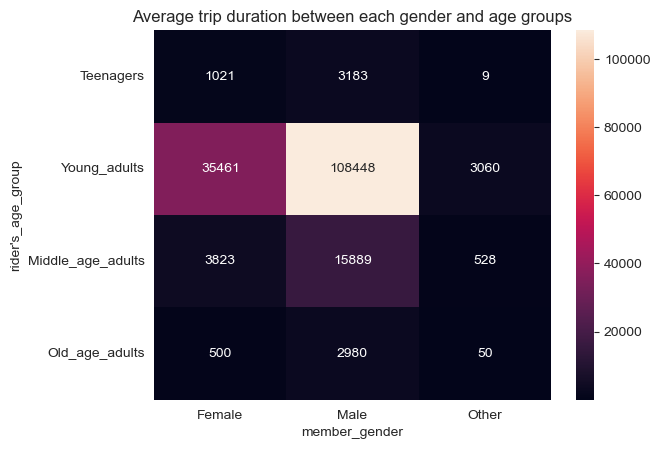

<Figure size 2000x2000 with 0 Axes>

In [55]:
counts = ford_trip_df_clean.groupby(["rider's_age_group", "member_gender"]).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index = "rider's_age_group", columns = "member_gender", values = 'count')

sb.heatmap(counts, annot = True, fmt = 'd')
plt.title('Average trip duration between each gender and age groups')
plt.figure(figsize=[20,20])

#### Inference
Male young adults have the highest population amidst users, followed by female young adults.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
<ul> 
    <li>It is noted that those who ride from between 12am to 4pm generally rides for a longer period of time. Also there is a similar long duration of ride between 11am to 1pm.
    <li>Both costomers and subscribers have a higher percentage of their users betweeb 20 and 40, with customers having more outlying values.
    <li>Most of the user don't share their bikes with the young adults having the greater percentage.
    <li>Averagely males rides for a shorter period of time with female riding for a longer period of time. Others have the highest average duration, but it has many outlying values.
    <li>There is no correlation between rider's age and duration
    <li>Male young adults have the highest population amidst users, followed by female young adults.
    <li>Averagely Young adults rides for a shorter period of time with Middle age adults riding for a longer period of time
    <li>Despite the fact that fewer number of trips were made during weekends, longer trips were made during weekends(saturdays and sundays) lasting for about 14 minutes on the average.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
<li>Despite the fact that fewer number of trips were made during weekends, longer trips were made during weekends(saturdays and sundays) lasting for about 14 minutes on the average.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5, 1.0, 'Average trip duration for each gender for those that shares bikes or not')

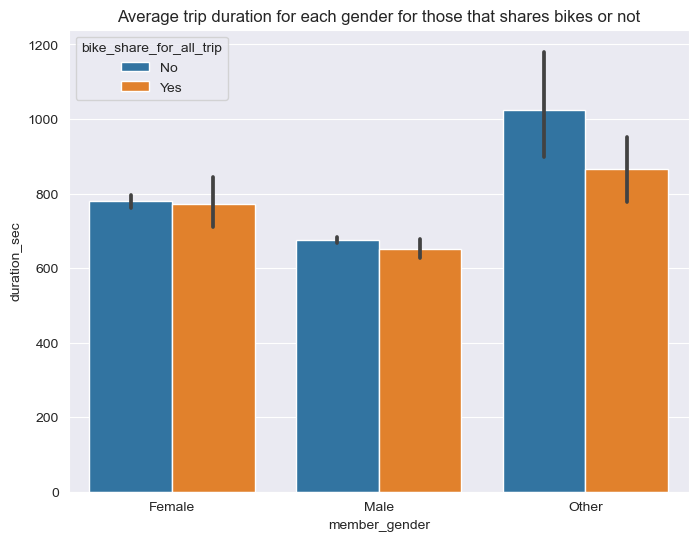

In [56]:
plt.figure(figsize=[8,6])
sb.barplot(data=ford_trip_df_clean, x='member_gender', y = 'duration_sec',hue  ='bike_share_for_all_trip')
plt.title('Average trip duration for each gender for those that shares bikes or not')

#### Inferences
This show how those who don't share their bikes ride for a longer time for all genders

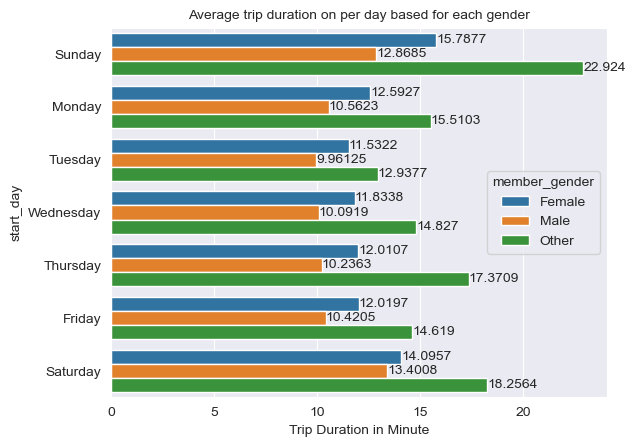

In [57]:
ax = sb.barplot(data = ford_trip_df_clean, y='start_day',x='duration_minutes', hue = 'member_gender', ci=None, order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] )
plt.xlabel('Trip Duration in Minute');
plt.title('Average trip duration on per day based for each gender', fontsize = 10)

for i in ax.containers:
    
    ax.bar_label(i,)

plt.show()

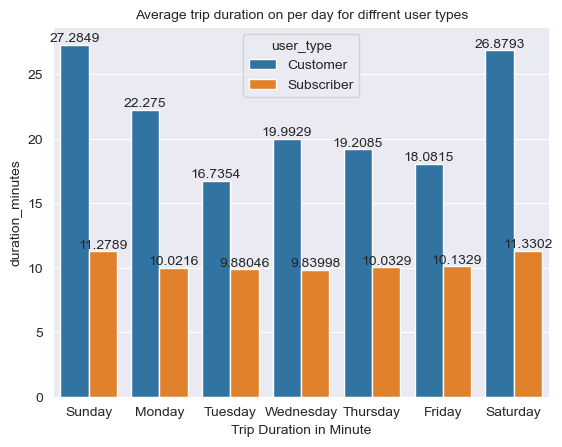

In [58]:
ax = sb.barplot(data = ford_trip_df_clean, x='start_day',y='duration_minutes', hue = 'user_type', ci=None, order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] )
plt.xlabel('Trip Duration in Minute');
plt.title('Average trip duration on per day for diffrent user types', fontsize = 10)

for i in ax.containers:
    
    ax.bar_label(i,)

plt.show()

#### Interference
costumers rides for a longer period of time when compared to the subscribers

#### Inferences

<ul>
<li>This buttresses that females generally rides longer than males. Females ride averagely for about 12.5 minutes on weekday and 15 minutes on weekends, while males rides for an average of 10 minutes on weekdays and 13 minutes on weekends.
<li> This also shows that those who chose others as genders ride averagely for a minimum of 12 minutes(that is on Tuesdays) and maximally for 23 minutes(on Sundays)

<Figure size 1200x1200 with 0 Axes>

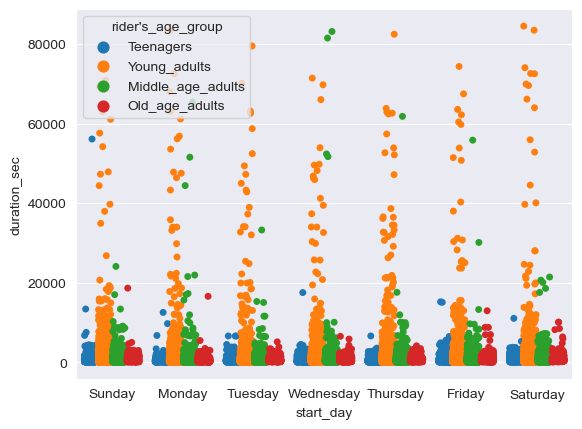

<Figure size 1200x1200 with 0 Axes>

In [59]:
sb.stripplot(x = 'start_day' , y = 'duration_sec' , hue = "rider's_age_group" , data= ford_trip_df_clean,order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] , jitter=0.35,dodge=True);
plt.figure(figsize = (12,12))

#### inferences
<ul>
<li>Generally, young adults rides for a longer period of time when compared to those in other age groups.

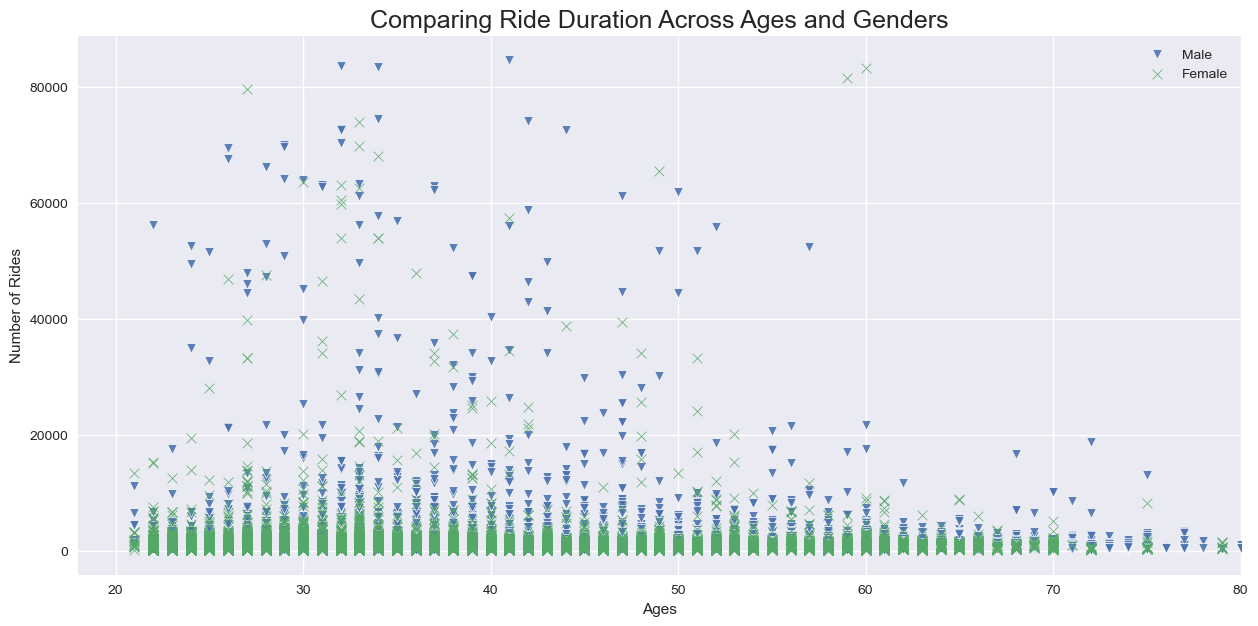

In [60]:
plt.figure(figsize = (15,7))
plt.style.use('seaborn')
gender_markers = [['Male', 'v'],
               ['Female', 'x'],]

for gender, marker in gender_markers:
    gender = ford_trip_df_clean[ford_trip_df_clean['member_gender'] == gender]
    sb.scatterplot(data = gender, x = 2022 - gender['member_birth_year'], y = 'duration_sec', marker = marker, alpha = .9);
plt.legend(['Male', 'Female', 'Other']);
plt.xlim(18, 80);
plt.title('Comparing Ride Duration Across Ages and Genders', fontsize = 18);
plt.xlabel('Ages');
plt.ylabel('Number of Rides');

<Figure size 1200x600 with 0 Axes>

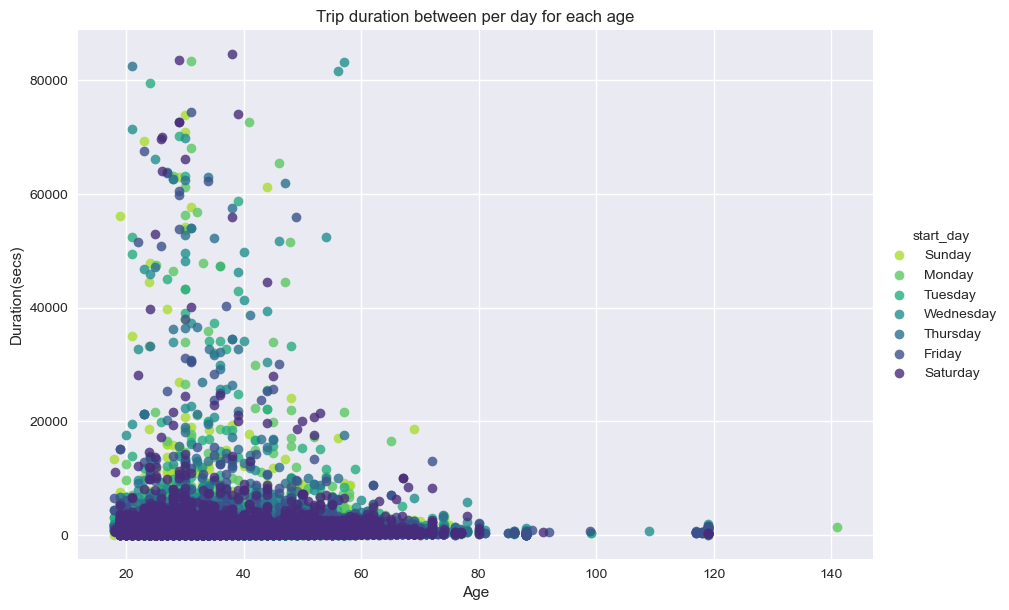

In [61]:
plt.figure(figsize = [12,6])
day_ordered = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'];
day = pd.api.types.CategoricalDtype(ordered=True, categories=day_ordered)
ford_trip_df_clean['start_day'] = ford_trip_df_clean['start_day'].astype(day)
g = sb.FacetGrid(data = ford_trip_df_clean, hue = 'start_day', height = 6, aspect = 1.5, palette = 'viridis_r');
g.map(sb.regplot,  "rider's_age", 'duration_sec', x_jitter = .04, fit_reg = False);
plt.xlabel('Age');
plt.title('Trip duration between per day for each age')
plt.ylabel('Duration(secs)');
g.add_legend()

#### Inference
Those between the age of 20 and 40 ridefor the longest time.

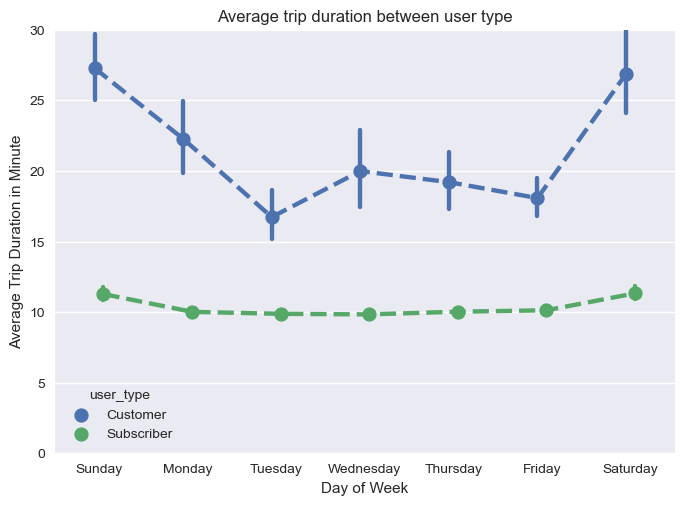

In [62]:
sb.pointplot(data=ford_trip_df_clean, x='start_day', y='duration_minutes', hue='user_type', dodge=0.1, linestyles='dashed');
plt.xlabel('Day of Week');
plt.ylim([0,30])
plt.ylabel('Average Trip Duration in Minute');
plt.title('Average trip duration between user type')
plt.show()

#### Inferences

This shows clearly how customers ride for a longer period of time when compared to subscribers. On Saturdays and Sundays, there is a significant rise in the duration of usage.

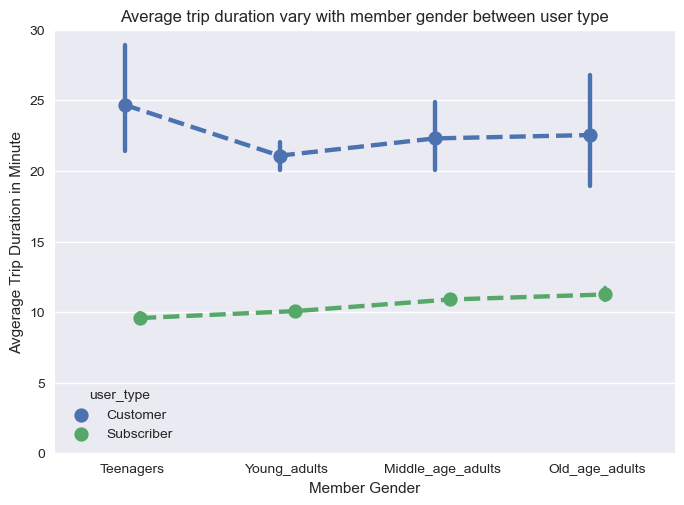

In [63]:
sb.pointplot(data = ford_trip_df_clean, x="rider's_age_group", y='duration_minutes', hue='user_type', dodge=0.1, linestyles="dashed");
plt.xlabel('Member Gender');
plt.ylim([0,30])
plt.ylabel('Avgerage Trip Duration in Minute');
plt.title('Average trip duration vary with member gender between user type')
plt.show()

#### Inference
This shows how teenagers that are subscribers rides generally for the shortest time, but teenagers that are customers ride for the longest time.

<AxesSubplot:>

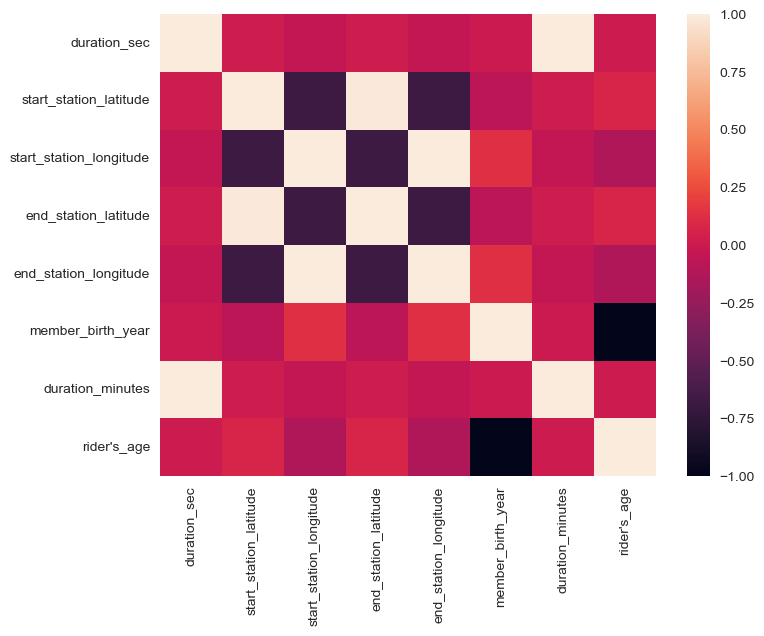

In [64]:
plt.figure(figsize=[8,6])

corr = ford_trip_df_clean.corr()
sb.heatmap(corr)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

<ul>
    <li>This show how those who don't share their bikes ride for a longer time for all genders.
    <li>This shows how teenagers that are subscribers rides generally for the shortest time, but teenagers that are customers ride for the longest time.
    <li>This shows clearly how customers ride for a longer period of time when compared to subscribers. On Saturdays and Sundays, there is a significant rise in the duration of usage.
    <li>Those between the age of 20 and 40 ride longest    
    <li>Generally, young adults rides for a longer period of time when compared to those in other age groups.
    <li>Females generally rides longer than males. Females ride averagely for about 12.5 minutes on weekday and 15 minutes on weekends, while males rides for an average of 10 minutes on weekdays and 13 minutes on weekends.
    <li> This also shows that those who chose others as genders ride averagely for a minimum of 12 minutes(that is on Tuesdays) and maximally for 23 minutes(on Sundays)

### Were there any interesting or surprising interactions between features?


## Conclusions
<ul>
    <li> Most of the users are between the age of 20 and 45.
    <li> Most trips start and end in the same day
    <li> Generally the busiest hours are between 7am to 9am and 4pm to 7pm, which is the business opening and closing hours of the day.
    <li>Week days(Mondays to Fridays) are generally very busy with alot of trips, this might be due work and school activities, but weekends(Saturday and sunday) are characterized with longer ride durations, which might be due the fact that rides are usually taken for recreation on these days.
    <li>There are more male than female users, but female users tends to ride for a longer duration averagelly.
    <li>The number of subscribing users are ten times the number of consumers, but consumers rides generally for a longer duration.